In [ ]:
# mirror_driver.py
# Eric Graves - eridgraves@gmail.com
# Created 06/30/2019

# Mechanical Mirror Test Code
# Beta code to transfer images to a stylized "low-fi" mirror representation
# As seen: https://www.smoothware.com/danny/newshinyballsmirror.html

In [20]:
# Imports and environment setup
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
%matplotlib inline

DEBUG = True

# Test image name
TEST_IMAGE = 'Lenna.png'#'image5.png'

(512, 512)


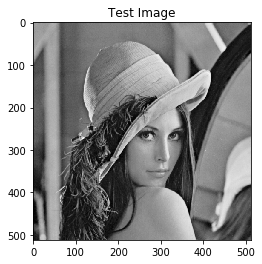

In [28]:
img = cv.imread(TEST_IMAGE, 0)
h,w = img.shape[:2]
print(img.shape)
plt.imshow(img,cmap='gray') # Use grayscale image
plt.title("Test Image")
plt.show()

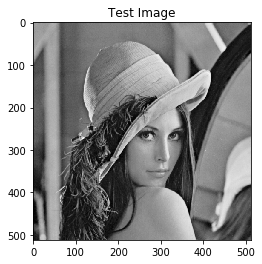

(512, 512)


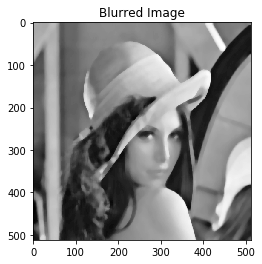

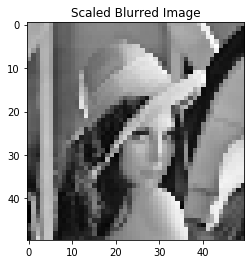

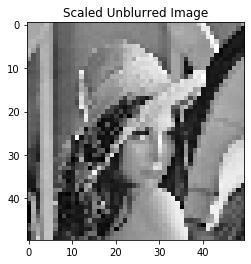

In [29]:
# Determine refresh rate --> probably 1/sec or so

# Get an image and crop to square 
img_crop = img[0:h,0:h] #img.crop(0,0,h,h) #img[0:w,0:w] 
if DEBUG : 
    plt.imshow(img_crop,cmap='gray') # Use grayscale image
    plt.title("Test Image")
    plt.show()
    print(img_crop.shape)
    
# Make destination image of same size
dst = np.zeros(h);

# Use Median Blur to average pixel areas over 50 x 50 regions
#-- Calculate kernel size : must be odd
mb_kern = (int) (h/50)
if mb_kern % 2 == 0:
    mb_kern += 1
#-- Blur over kernal size 
dst = cv.medianBlur(img_crop, mb_kern)
if DEBUG : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Blurred Image")
    plt.show()

# Resize image to 50x50 pixels
#-- From Median Blurred Image : looks better
dst = cv.resize(dst, (50,50))
if DEBUG : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Scaled Blurred Image")
    plt.show()
    
#-- Without Median Blur
dst = cv.resize(img_crop, (50,50))
if DEBUG : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Scaled Unblurred Image")
    plt.show()
    
    
#-- One region per motor
#-- Median filter? Or focus on edges, and transfer each to nearest region.

#TODO: Send to output
#-- Can this be parallelized?
#-- For now: print out as text